In [1]:
# general purpose data manipulation and analysis
import numpy as np

# packages for working with raster datasets
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
from rasterio.enums import Resampling

import xarray # allows us to work with raster data as arrays


# packages for working with geospatial data
import geopandas as gpd
import pycrs

from shapely.geometry import box
import rioxarray

# import packages for viewing the data
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

In [2]:
# matplotlib functionality
%matplotlib inline
# %matplotlib notebook

In [3]:
# open the raster
fparts_SD_GM_3m = "Data/ASO_3M_SD_USCATB_20130525.tif"

In [4]:
SD_GM_3m = rasterio.open(fparts_SD_GM_3m)

In [31]:
#open in array
dat_array_3m = rioxarray.open_rasterio(fparts_SD_GM_3m,mask_and_scale=True)

In [22]:
#!pip install -q contextily
import contextily as ctx

In [32]:
dat_array_3m=dat_array_3m.where(dat_array_3m>0)
dat_array_30m_4326 = dat_array_3m.coarsen(x=10,y=10,boundary='pad').median().rio.reproject("EPSG:4326")

Text(0.5, 1.0, 'title')

/home/etboud/mambaforge/envs/planet_env/lib/python3.11/site-packages/matplotlib/colors.py:732: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


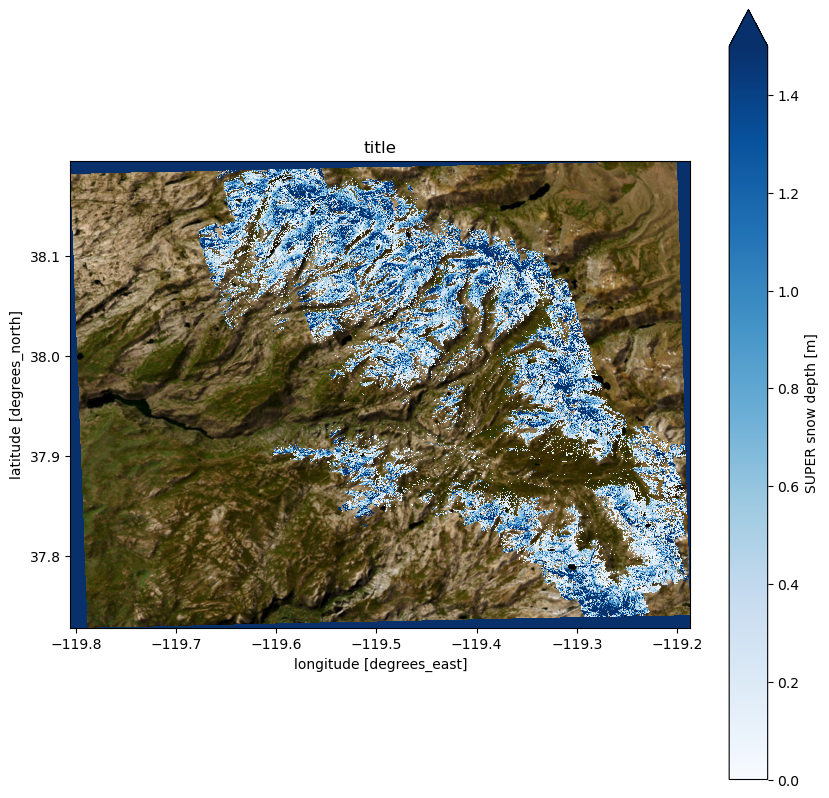

In [33]:
f,ax=plt.subplots(figsize=(10,10))

dat_array_30m_4326.plot(ax=ax,cmap='Blues',vmin=0,vmax=1.5)
ç)

Text(0.5, 0, '')

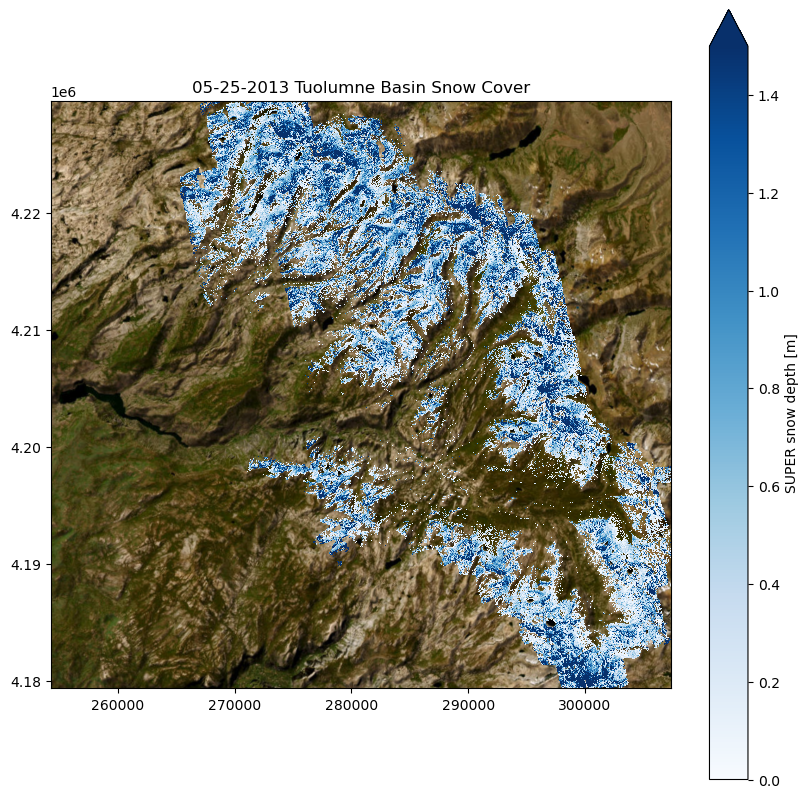

In [35]:
f,ax=plt.subplots(figsize=(10,10))

dat_array_3m.coarsen(x=10,y=10,boundary='pad').median().plot(ax=ax,cmap='Blues',vmin=0,vmax=1.5)
ctx.add_basemap(ax=ax,crs=dat_array_3m.rio.crs,source=ctx.providers.Esri.WorldImagery,attribution='')
ax.set_title('05-25-2013 Tuolumne Basin Snow Cover')
ax.set_ylabel('')
ax.set_xlabel('')

In [9]:
dat_array_3m.squeeze().plot()

In [6]:
#not so sure what this is doing
a = SD_GM_3m.read(1)
#removing NaN values
a = np.ma.masked_equal(a, -9999.0)

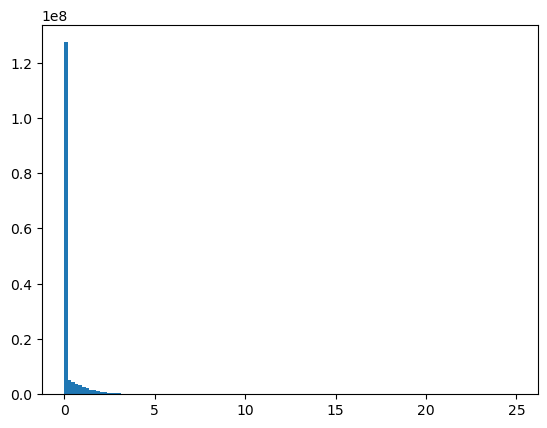

In [15]:
#understanding the value distribution
f, ax = plt.subplots()
ax.hist(a.ravel(), bins=128);

In [8]:
idx = a>0

In [16]:
mask=np.ma.masked_equal(a, 0)

In [10]:
cover = a[idx]
cover
a

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-9999.0,
  dtype=float32)

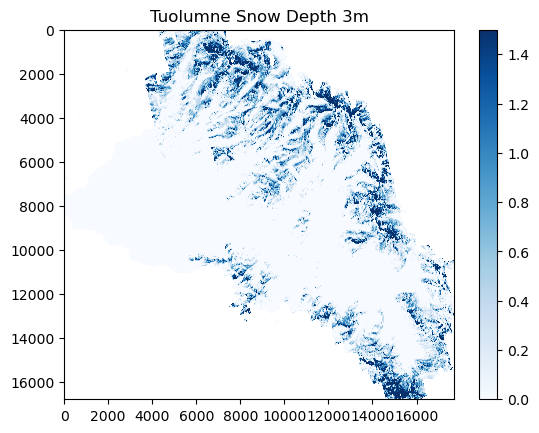

In [17]:
fig2, ax2 = plt.subplots()
pos2 = ax2.imshow(a, cmap='Blues', vmin=0, vmax=1.5);
ax2.set_title('Tuolumne Snow Depth 3m')
fig2.colorbar(pos2, ax=ax2)

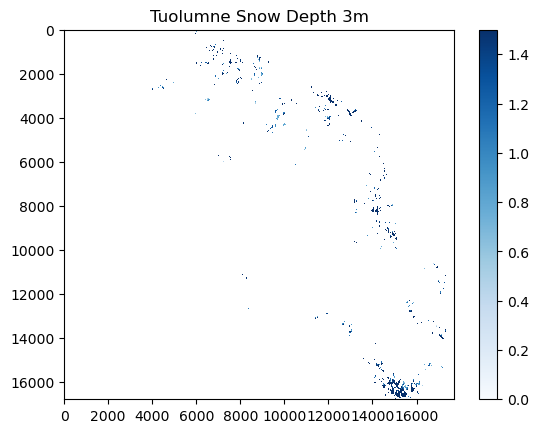

In [18]:
fig2, ax2 = plt.subplots()
pos2 = ax2.imshow(mask, cmap='Blues' ,vmin=0,vmax=1.5);
ax2.set_title('Tuolumne Snow Depth 3m')
fig2.colorbar(pos2, ax=ax2)